In [29]:
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
disneydf= pd.read_csv(r'/content/disney_plus_titles.csv')

In [57]:
disneydf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [58]:
disneydf.shape

(1450, 12)

In [59]:
disneydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [60]:
disneydf.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

# *Exploratory Data Analysis*

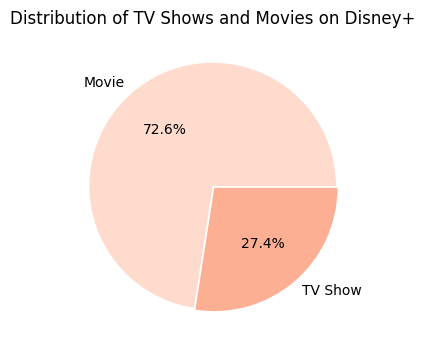

In [61]:
#Distribution of TV Shows and Movies on Disney+
import seaborn as sns
plt.figure(figsize=(4,4))
x= disneydf['type'].value_counts().index
y= disneydf['type'].value_counts().values
plt.pie(y, labels=x, autopct='%1.1f%%', colors =sns.color_palette('Reds'), explode=[0,0.02])
plt.title('Distribution of TV Shows and Movies on Disney+')
plt.legend
plt.show()

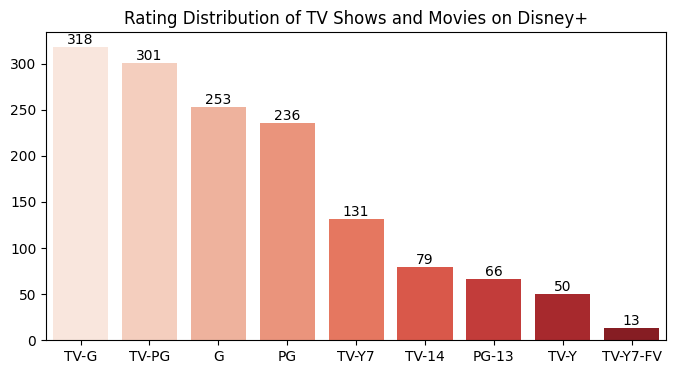

In [81]:
#Rating Distribution of TV Shows and Movies on Disney+
x1=disneydf['rating'].value_counts().index
y1=disneydf['rating'].value_counts().values
plt.figure(figsize=(8,4))
ax =sns.barplot(x=x1,y=y1, palette='Reds')
ax.bar_label(ax.containers[0])
plt.title('Rating Distribution of TV Shows and Movies on Disney+')
plt.legend
plt.show()

In [63]:
disneydf['release_year']

0       2016
1       1988
2       2011
3       2021
4       2021
        ... 
1445    2009
1446    2009
1447    2016
1448    2003
1449    2012
Name: release_year, Length: 1450, dtype: int64

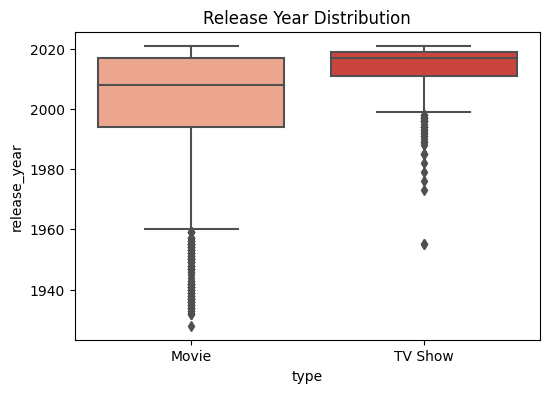

In [64]:
#Boxplot on Release year
plt.figure(figsize=(6,4))
sns.boxplot(data =disneydf, y='release_year',x='type', palette='Reds')
plt.title('Release Year Distribution')
plt.legend
plt.show()

In [65]:
disneydf['date_added']

0        November 26, 2021
1        November 26, 2021
2        November 26, 2021
3        November 26, 2021
4        November 25, 2021
               ...        
1445          June 4, 2021
1446         April 2, 2021
1447     December 18, 2020
1448    September 18, 2020
1449         April 1, 2020
Name: date_added, Length: 1450, dtype: object

In [66]:
disneydf['date_added'] = pd.to_datetime(disneydf['date_added'], format = "%B %d, %Y")
disneydf['date_added'].head(10)

0   2021-11-26
1   2021-11-26
2   2021-11-26
3   2021-11-26
4   2021-11-25
5   2021-11-24
6   2021-11-24
7   2021-11-24
8   2021-11-24
9   2021-11-19
Name: date_added, dtype: datetime64[ns]

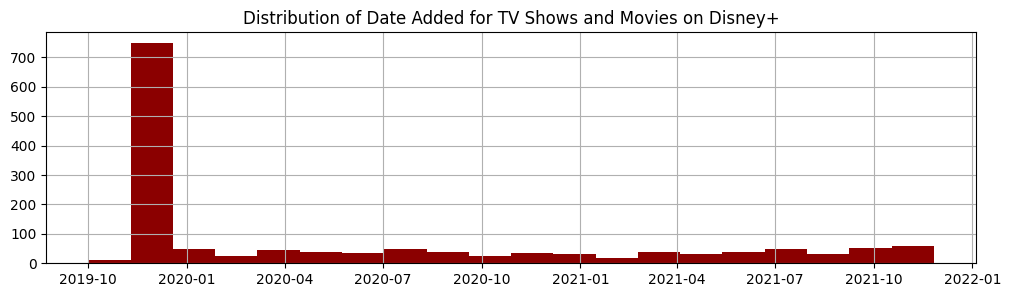

In [67]:
#Distribution of Date Added for TV Shows and Movies on Disney+
plt.figure(figsize=(12,3))
disneydf['date_added'].hist(bins=20, color='darkred')
plt.title('Distribution of Date Added for TV Shows and Movies on Disney+')
plt.legend
plt.show()

In [68]:
disneydf['season'] = disneydf.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
disneydf['duration'] = disneydf.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [69]:
disneydf['duration'] = disneydf['duration'].astype("int64")
disneydf['season'] = disneydf['season'] .astype("int64")

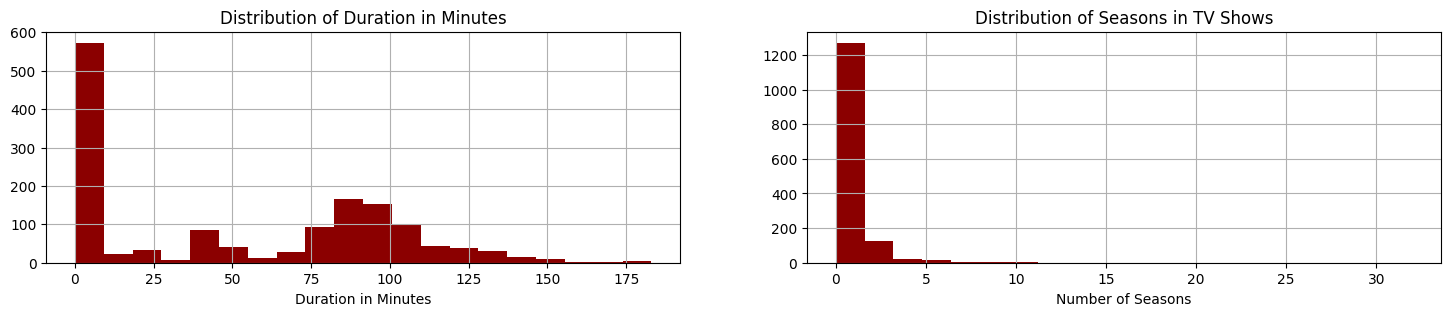

In [73]:
#Distribution of Duration and Seasons in Movies and TV Shows on Disney+
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
disneydf['duration'].hist(bins=20, color= 'darkred')
plt.xlabel('Duration in Minutes')
plt.title('Distribution of Duration in Minutes')
plt.subplot(1,2,2)
disneydf['season'].hist(bins=20, color='darkred')
plt.xlabel('Number of Seasons')
plt.title('Distribution of Seasons in TV Shows')
plt.legend
plt.show()

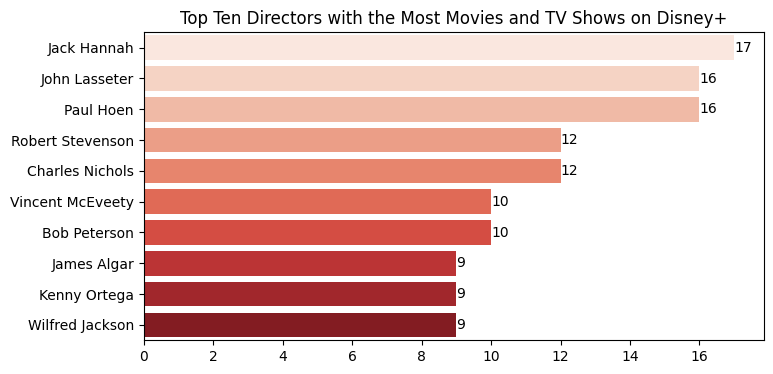

In [80]:
#Top Ten Directors with the Most Movies and TV Shows on Disney+
x1= disneydf['director'].value_counts().head(10).index
y1= disneydf['director'].value_counts().head(10).values
plt.figure(figsize=(8,4))
ax =sns.barplot(x=y1,y=x1, palette ='Reds')
ax.bar_label(ax.containers[0])
plt.title('Top Ten Directors with the Most Movies and TV Shows on Disney+')
plt.legend
plt.show()

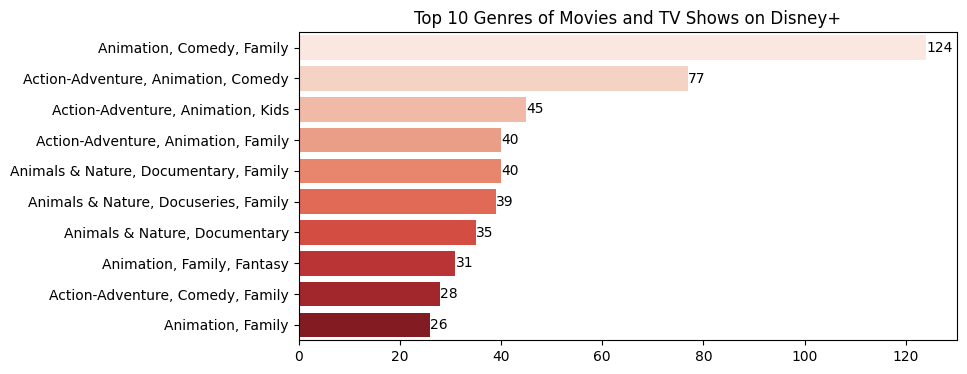

In [79]:
#Top 10 Genres of Movies and TV Shows on Disney+
x1= disneydf['listed_in'].value_counts().head(10).index
y1= disneydf['listed_in'].value_counts().head(10).values
plt.figure(figsize=(8.5,4))
ax =sns.barplot(x=y1,y=x1, palette ='Reds')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Genres of Movies and TV Shows on Disney+')
plt.legend
plt.show()

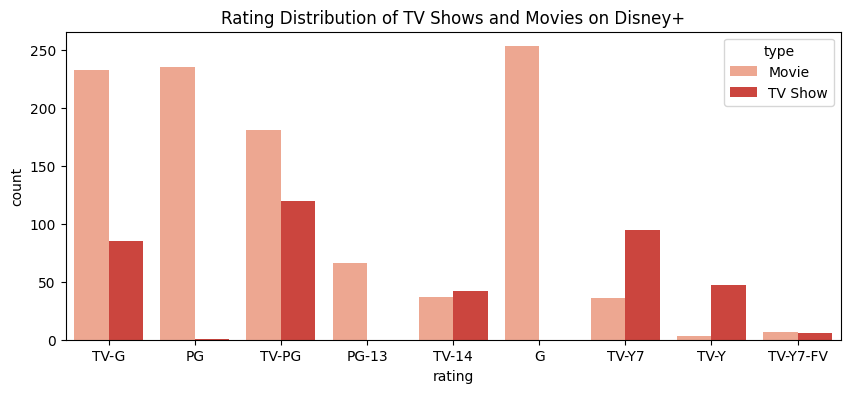

In [78]:
#Rating Distribution of TV Shows and Movies on Disney+
plt.figure(figsize=(10,4))
sns.countplot(data=disneydf, x='rating',hue='type', palette='Reds')
#c1.bar_label(c1.containers[0],size = 15)
plt.title('Rating Distribution of TV Shows and Movies on Disney+')
plt.legend
plt.show()